In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("/content/laptop_prices_ML.csv")

In [5]:
df.head()

,Company,Processor,Ram,Storage,ScreenW,ScreenH,GPU,Weight,Price
0,Apple,Core i5,8,128,2560,1600,Intel,1.37,1339.69
1,Apple,Core i5,8,128,1440,900,Intel,1.34,898.94
2,HP,Core i5 7200U,8,256,1920,1080,Intel,1.86,575.00
3,Apple,Core i7,16,512,2880,1800,AMD,1.83,2537.45
4,Apple,Core i5,8,256,2560,1600,Intel,1.37,1803.60


In [6]:
df = df.drop(columns=["ScreenH","ScreenW"])

In [7]:
df.head()

,Company,Processor,Ram,Storage,GPU,Weight,Price
0,Apple,Core i5,8,128,Intel,1.37,1339.69
1,Apple,Core i5,8,128,Intel,1.34,898.94
2,HP,Core i5 7200U,8,256,Intel,1.86,575.00
3,Apple,Core i7,16,512,AMD,1.83,2537.45
4,Apple,Core i5,8,256,Intel,1.37,1803.60


In [8]:
#we have categerioal data in 3 columns we need to convert into number data to understand for machine..!
df = pd.get_dummies(df, columns =  ['Company','Processor','GPU'], drop_first=True)

In [12]:
X = df.drop('Price', axis=1)
X

,Ram,Storage,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Processor_Pentium Quad Core N3710,Processor_Pentium Quad Core N4200,Processor_Ryzen 1600,Processor_Ryzen 1700,Processor_Xeon E3-1505M V6,Processor_Xeon E3-1535M v5,Processor_Xeon E3-1535M v6,GPU_ARM,GPU_Intel,GPU_Nvidia
0,8,128,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,8,128,1.34,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,256,1.86,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,16,512,1.83,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,256,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,4,128,1.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1271,16,512,1.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1272,2,64,1.50,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1273,6,1024,2.19,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [14]:
Y = df['Price']
Y

,Price
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [15]:
#Train_test_split
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
#Creating model
from sklearn.linear_model import LinearRegression

In [18]:
regression  = LinearRegression()

In [19]:
#train my data
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
#predict my new data to my model
y_pred = regression.predict(X_test)
y_pred

array([ 717.9499768 ,  645.13769644, 1368.22081   ,  965.38091808,
       1146.72597511,  789.35602753, 1031.63099691,  723.29462224,
       1884.93735452,  726.08139662, 1334.47618235, 1039.29441775,
       1200.71398176, 1322.36163595, 2066.58635748,  796.12436552,
       1354.32429832, 1272.91678695, 2203.46407083, 2631.20815568,
        852.4049397 ,  872.7357975 , 1367.51052862, 1664.29107487,
       1080.14134123, 1742.62688727,  928.96249383, 1082.98665425,
        657.66801408, 1114.0555097 , 1136.07423266,  876.50329312,
        826.86414528,  240.95324674, 1427.0153786 , 1149.19377347,
       1135.36395127,  175.86731219, 1146.02476506, 1071.87107114,
       1436.69241265,  371.93833292, 1192.19305514, 1078.70798727,
        916.24442741, 1146.18471892, 1345.91036212,  743.66751303,
       1749.55968965, 1074.61422795,  970.45580158,  299.90417967,
       2541.77092758,  319.08177709, 1034.30115803, 1279.34337561,
        906.94377087, 1289.13563042, 1525.17460063, 1091.97461

In [22]:
#Using performance metrics to analyze how much accuracy my model is performing
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rsme = np.sqrt(mse)
print(mse)
print(mae)
print(rsme)

124167.71566884316
267.44816118218176
352.3743970109678


In [24]:
#Rsquare
from sklearn.metrics import r2_score

In [25]:
score = r2_score(Y_test,y_pred)
score

0.7498329832426864

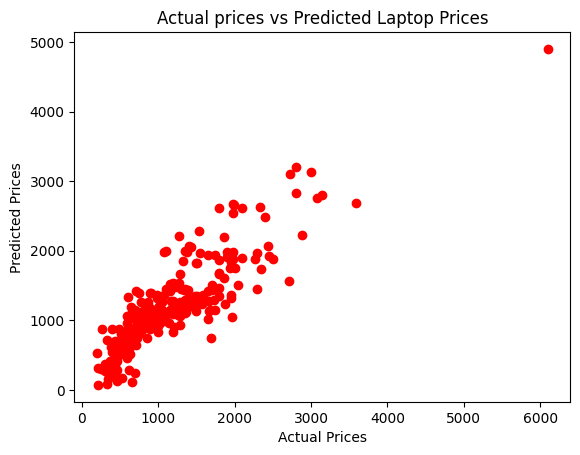

In [36]:
#Visulaize results
plt.scatter(Y_test, y_pred,color = 'red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Laptop Prices")
plt.show()